In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm
from itertools import combinations

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lineages = 10
test_cases = 10

In [ ]:
# Run for k_point, varying the number of points

crossover_method = 'k_point'
range_k_crossover_points = np.linspace(2, 12, test_cases, dtype=int)

total_combinations = len(target_expressions) * len(range_k_crossover_points)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for k_crossover_points in range_k_crossover_points:
        current_combination += 1
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            crossover=crossover_method, # Dependant variable
            k_crossover_points=k_crossover_points, # Dependant variable
        )
        # Time the run
        start_time = time.time()
        best_sequences, best_predictions = ga.run(lineages)
        end_time = time.time()

        # Record the results
        for sequence, prediction in zip(best_sequences, best_predictions):
            results.append({
                'target_expression': target_expression,
                'crossover_method': crossover_method,
                'k_crossover_points': k_crossover_points,
                'error': abs(prediction - target_expression),
                'run_time': (end_time - start_time) / lineages
            })
        
        # Update progress bar
        progress_bar.update(1)
        elapsed_time = time.time() - initial_time
        progress_bar.set_postfix({
            "Elapsed": format_time(elapsed_time),
            "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
        })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/crossover_methods/k_point_include_boundaries.csv', index=False)

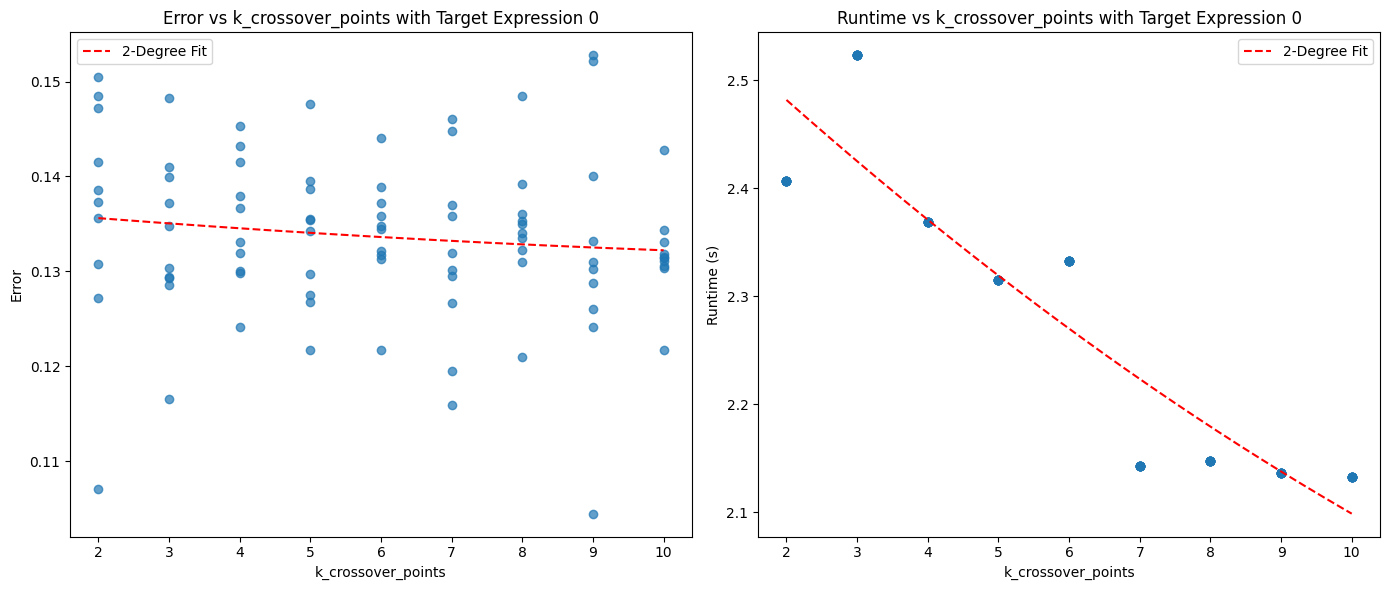

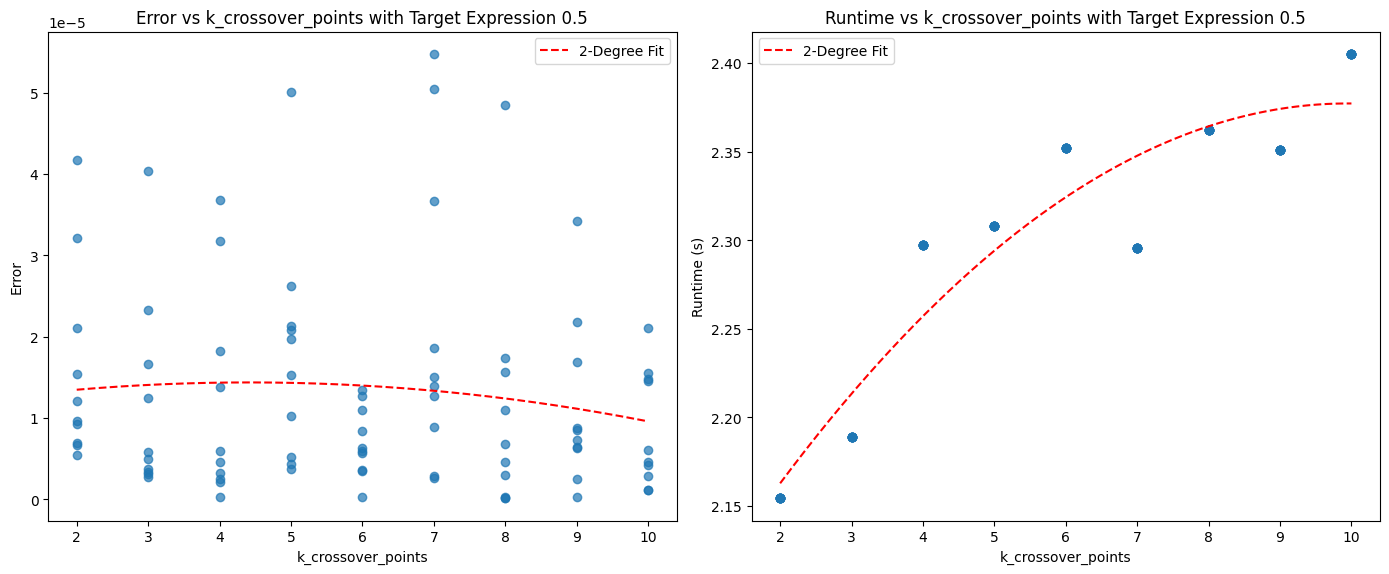

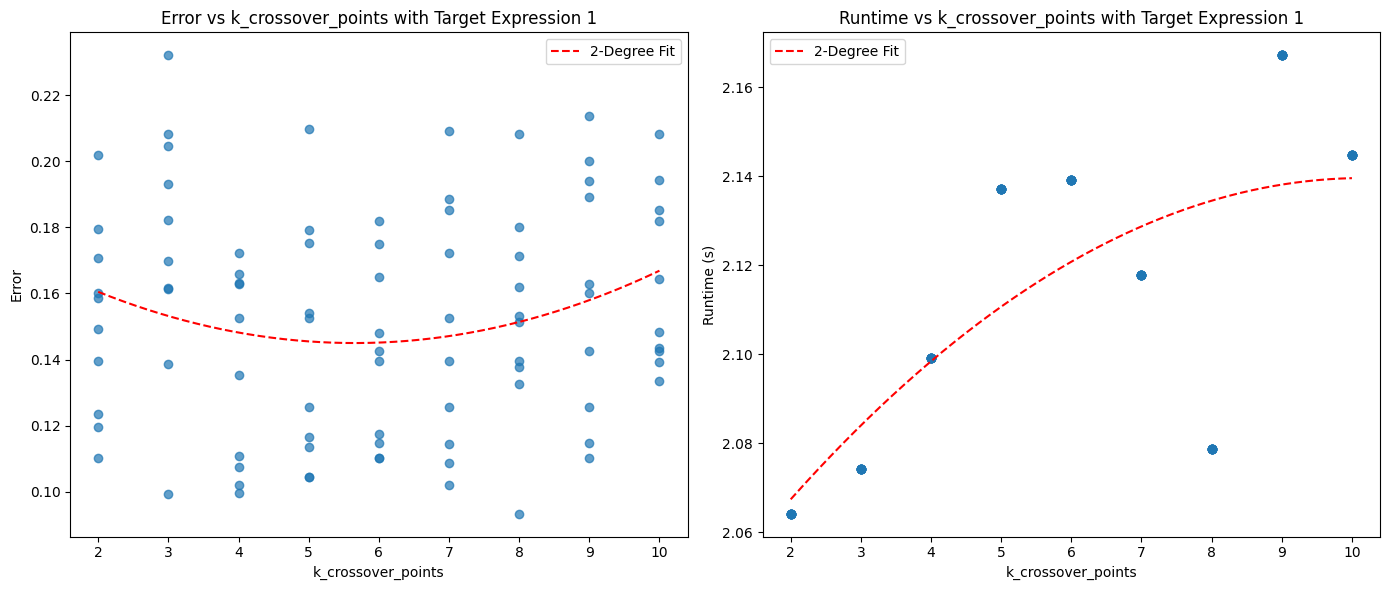

In [5]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'k_crossover_points', polynomial_degree=2)

In [6]:
# Run distribution for all other crossover methods
crossover_methods = ['single_point', 'k_point', 'uniform', 'PMX', 'shuffle']

total_combinations = len(target_expressions) * len(crossover_methods) * lineages
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
results = []

for target_expression in target_expressions:
    for crossover_method in crossover_methods:
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            crossover=crossover_method, # Dependant variable
        )
        for _ in range(lineages):
            current_combination += 1

            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run()
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                results.append({
                    'target_expression': target_expression,
                    'crossover_method': crossover_method,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time)
                })
        
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            progress_bar.set_postfix({
                "Elapsed": format_time(elapsed_time),
                "ETA": format_time(((elapsed_time / current_combination) * (total_combinations - current_combination)))
            })

# Close progress bar
progress_bar.close()

results_df = pd.DataFrame(results)
results_df.to_csv('Data/crossover_methods/comparison.csv', index=False)

Processing combinations: 100%|██████████| 150/150 [05:42<00:00,  2.29s/it, Elapsed=5.71min, ETA=0.00s]  


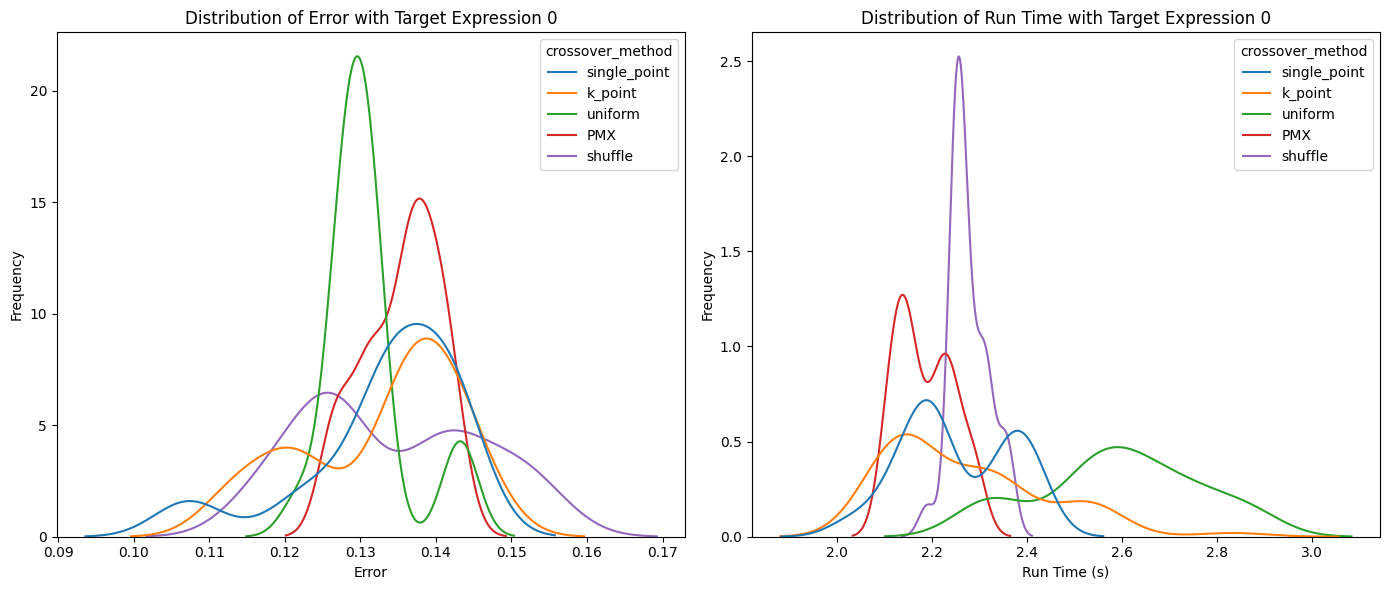

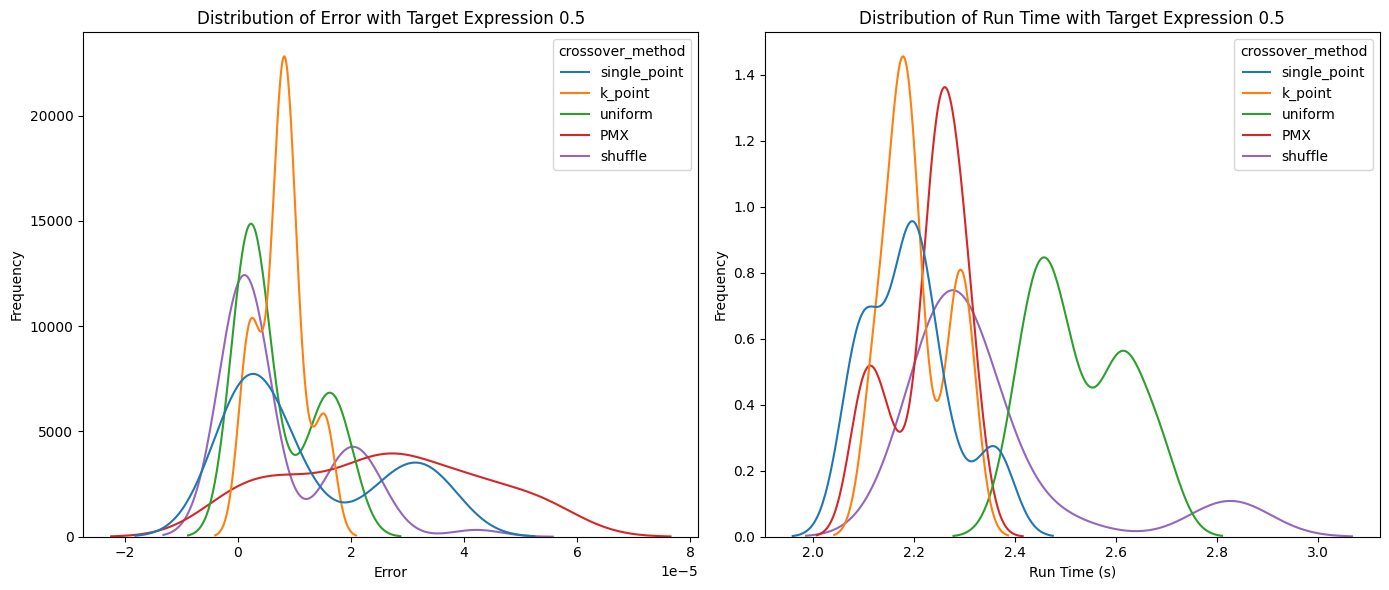

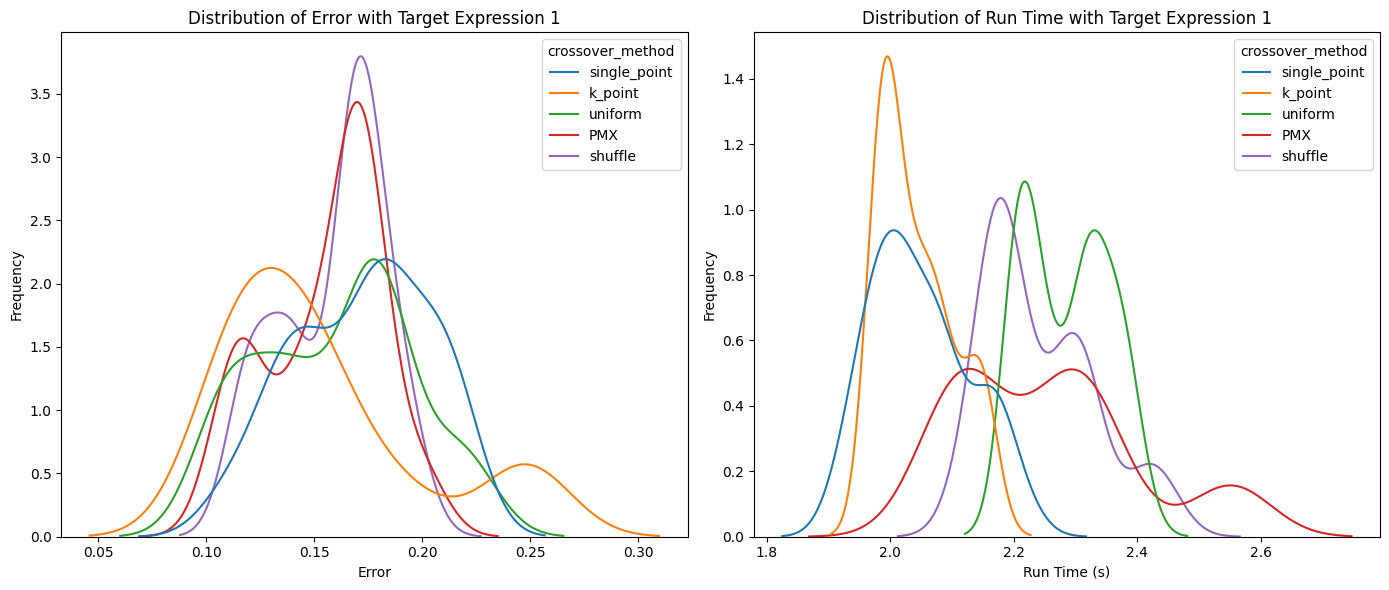

In [ ]:
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'crossover_method')

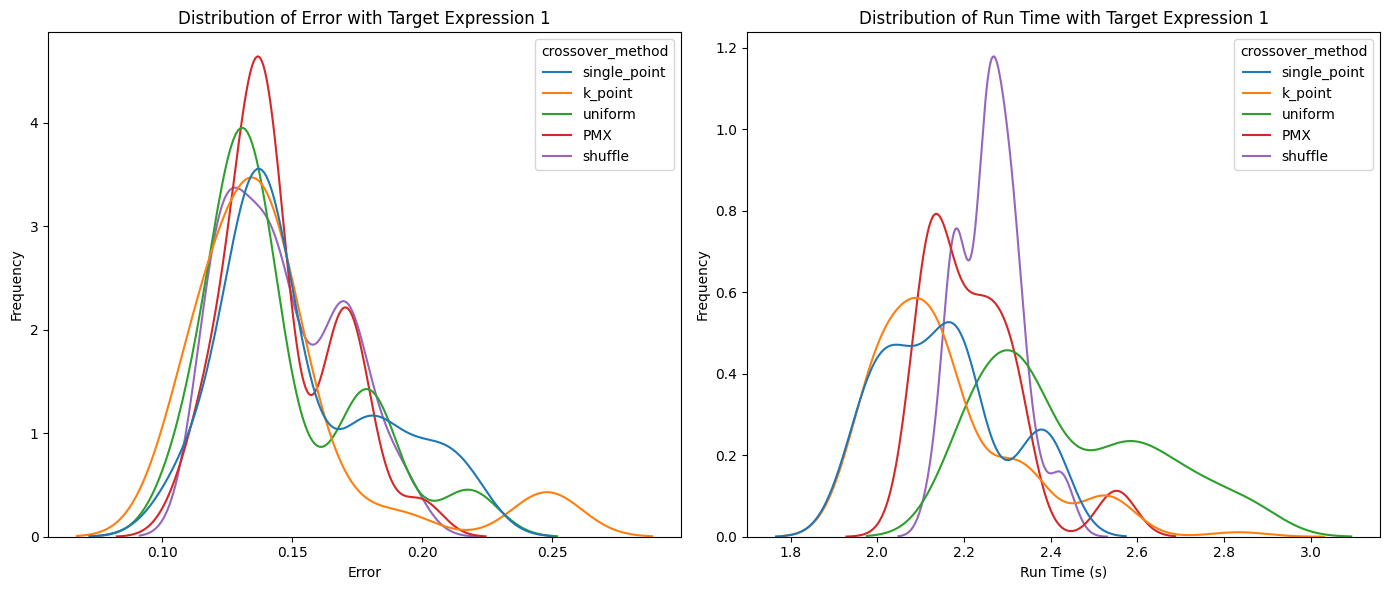

In [ ]:
filter_df = results_df[results_df['target_expression'] != 0.5]
distribution_plot(filter_df, target_expression, 'crossover_method')